<IPython.core.display.Javascript object>


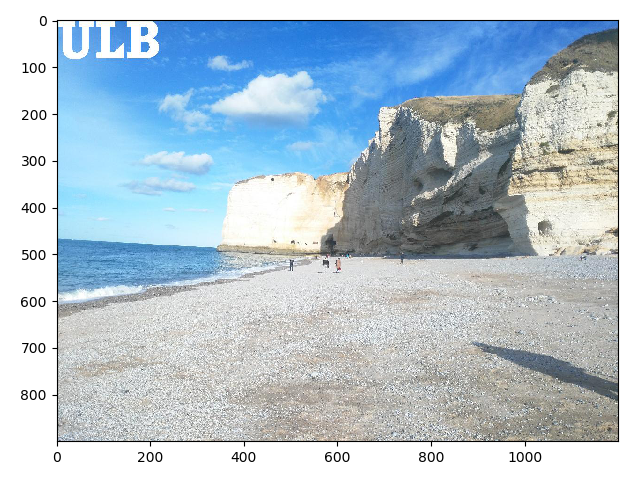

In [119]:
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
%matplotlib notebook

im= Image.open('paysage.jpg')
watermark = Image.open('watermark.png')
im.paste(watermark,mask=watermark.convert('L'))
im.save('main.jpg')
im = imread('main.jpg')
plt.figure()
imshow(im)
plt.show()


<IPython.core.display.Javascript object>


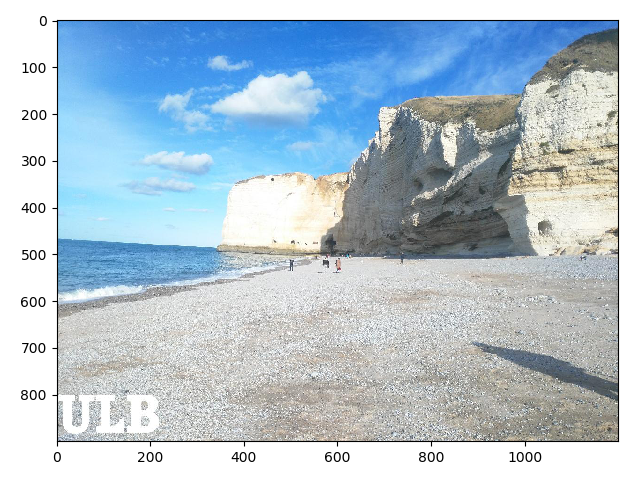

In [120]:
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
%matplotlib notebook

im= Image.open('paysage.jpg')
watermark = Image.open('watermark.png')
im.paste(watermark,box=(0,800),mask=watermark.convert('L'))
im.save('main_position.jpg')
im = imread('main_position.jpg')
plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


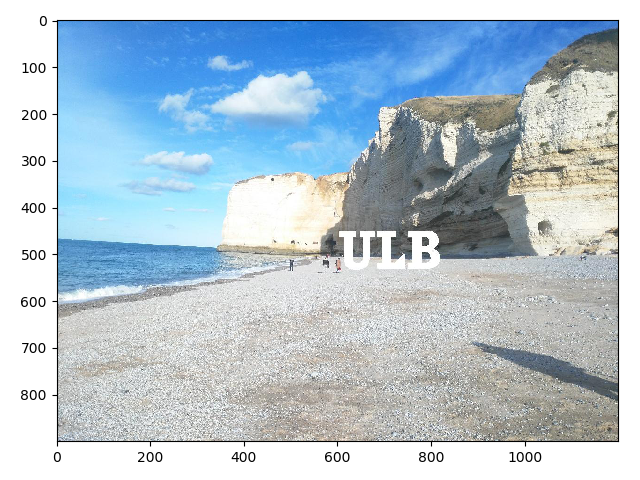

In [121]:
#adding the watermark in the center of the image
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
%matplotlib notebook

im= Image.open('paysage.jpg')
im_array = imread('paysage.jpg')
watermark = Image.open('watermark.png')
#compute the center
centery, centerx = [int (im_array.shape[0] /2) , int (im_array.shape[1] /2)]
im.paste(watermark,box=(centerx,centery),mask=watermark.convert('L'))
im.save('main_centring.jpg')
im = imread('main_centring.jpg')
plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


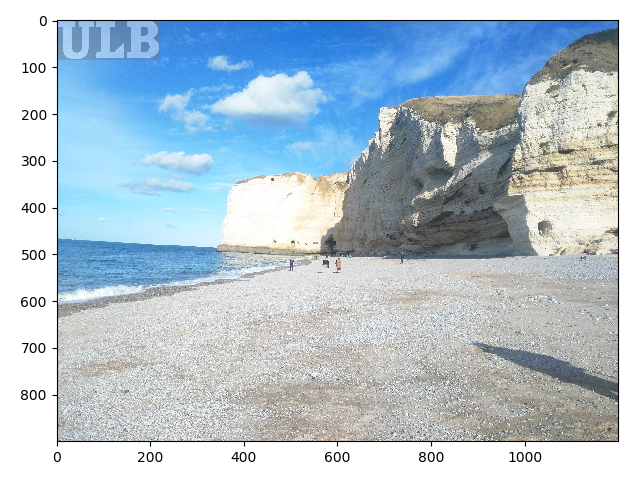

In [122]:
from PIL import Image
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
%matplotlib notebook

im= Image.open('paysage.jpg').convert('RGBA')
watermark = Image.open('watermark.png').convert('RGBA')
watermark.putalpha(70)

im.paste(watermark, mask=watermark) 
im.save('main_transparent.png')
im = imread('main_transparent.png')
plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


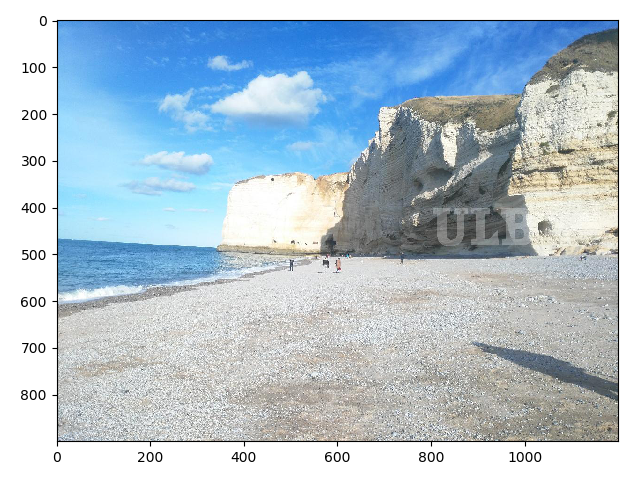

In [123]:
from skimage.io import imshow
import matplotlib . pyplot as plt
from PIL import Image 

im= Image.open('paysage.jpg')
watermark = Image.open('watermark.png')
im2 = Image.new ('L',watermark.size)
mask = Image.new ('L',watermark.size, 70)
im2.paste(watermark,(0,0),mask)
im.paste(watermark, (800,400),im2)
im.save('main_transparent2.jpg')
im = imread('main_transparent2.jpg')
plt.figure()
imshow(im)
plt.show()

<IPython.core.display.Javascript object>


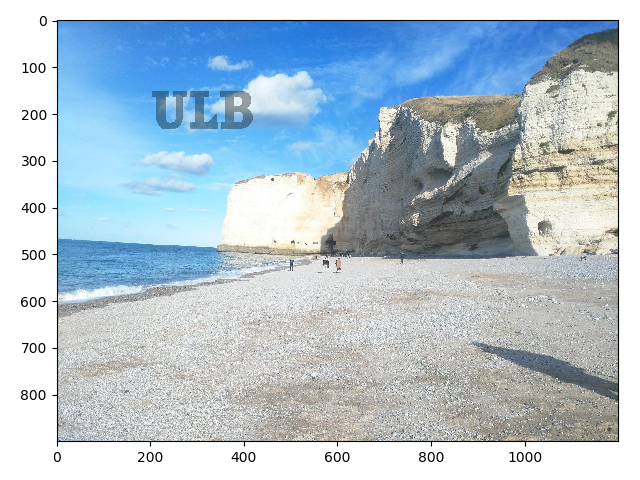

In [124]:
#we consider a image with mean superior to 120 is a bright image
from skimage.io import imshow
import matplotlib . pyplot as plt
from PIL import Image, ImageStat,ImageOps

im= Image.open('paysage.jpg')
im_grey = Image.open('paysage.jpg').convert('L')
stat = ImageStat.Stat(im_grey)

watermark = Image.open('watermark.png').convert('L')
im2 = Image.new ('L',watermark.size)
mask = Image.new ('L',watermark.size, 90)
im2.paste(watermark,(0,0),mask)

if stat.mean[0] > 120: #we have only one value because we already convert the image to grey   
    watermark_invert= ImageOps.invert(watermark)
    im.paste(watermark_invert,box=(200,150),mask=im2)
else :
    im.paste(watermark,box=(200,150),mask=im2)
im.save('main_darkorlight.jpg')
im = imread('main_darkorlight.jpg')
plt.figure()
imshow(im)
plt.show()


Lossy conversion from float32 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.


<IPython.core.display.Javascript object>


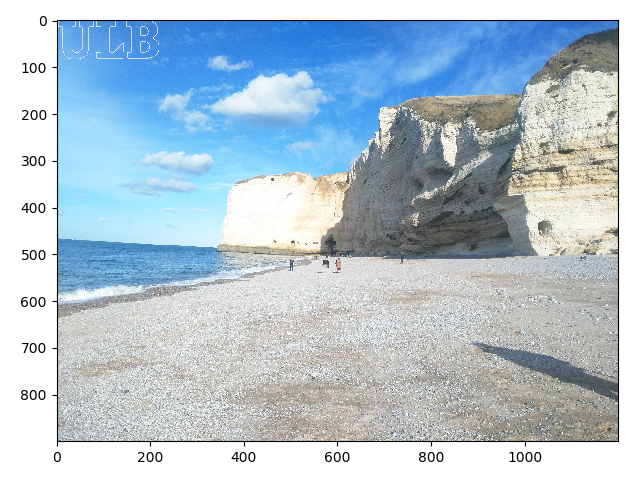

In [125]:
from PIL import Image
from skimage import filters
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow,imsave

watermark = imread('watermark.png')

fsobel = filters.sobel(watermark)
norm = 255*fsobel/np.max(fsobel)
norm = np.reshape(norm, (85, 219))

sobelwatermark=Image.fromarray(norm)
sobelwatermark.dtype = 'uint8'
imsave('sobelwatermark.png',sobelwatermark)
im= Image.open('paysage.jpg')
im.paste(sobelwatermark,mask=sobelwatermark.convert('L'))
im.save('main_sobel.png')
im = imread('main_sobel.png')
plt.figure()
imshow(im)
plt.show()